In [1]:
import pandas as pd
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
with open("../dataset/대여소별_이용권비율.pkl","rb") as fr:
    df_station= pickle.load(fr)

In [6]:
df_station.head()

,station_id,19_week_daily,19_week_regular,19_hol_daily,19_hol_regular,20_week_daily,20_week_regular,20_hol_daily,20_hol_regular
0,1001,0.172905,0.827095,0.316646,0.683354,0.258624,0.741376,0.392308,0.607692
1,1002,0.183894,0.816106,0.356350,0.643650,0.283254,0.716746,0.454603,0.545397
2,1003,0.154073,0.845927,0.259140,0.740860,0.238314,0.761686,0.364192,0.635808
3,1004,0.172014,0.827986,0.301563,0.698438,0.272103,0.727897,0.428854,0.571146
4,1006,0.113201,0.886799,0.241314,0.758686,0.197472,0.802528,0.357414,0.642586


In [7]:
df_station.shape

(2183, 9)

In [8]:
sta_info=pd.read_csv('../dataset/con_sta_info.csv')
sta_info.head()

,ID,stationName,Y,X,Xn,Yn,Elev,BikeRoadNM,ToBikeRoad
0,101,101. (구)합정동 주민센터,37.549561,126.905754,947509.050934,1.950191e+06,9.152323,한강자전거길,771.0
1,102,102. 망원역 1번출구 앞,37.555649,126.910629,947943.924406,1.950863e+06,6.963737,홍제천자전거길,1065.0
2,103,103. 망원역 2번출구 앞,37.554951,126.910835,947961.634042,1.950786e+06,6.865565,한강자전거길,1146.0
3,104,104. 합정역 1번출구 앞,37.550629,126.914986,948325.239132,1.950304e+06,18.136753,한강자전거길,676.0
4,105,105. 합정역 5번출구 앞,37.550007,126.914825,948310.657239,1.950235e+06,17.498430,한강자전거길,962.0


In [9]:
id_info=sta_info['ID'].unique().tolist()
id_info=[str(i) for i in id_info]
id_info[:5]

['101', '102', '103', '104', '105']

In [10]:
df_station=df_station[df_station['station_id'].isin(id_info)].reset_index(drop=True)
df_station.head()

,station_id,19_week_daily,19_week_regular,19_hol_daily,19_hol_regular,20_week_daily,20_week_regular,20_hol_daily,20_hol_regular
0,1001,0.172905,0.827095,0.316646,0.683354,0.258624,0.741376,0.392308,0.607692
1,1002,0.183894,0.816106,0.356350,0.643650,0.283254,0.716746,0.454603,0.545397
2,1003,0.154073,0.845927,0.259140,0.740860,0.238314,0.761686,0.364192,0.635808
3,1004,0.172014,0.827986,0.301563,0.698438,0.272103,0.727897,0.428854,0.571146
4,1006,0.113201,0.886799,0.241314,0.758686,0.197472,0.802528,0.357414,0.642586


In [11]:
df_station.shape

(1527, 9)

In [12]:
df_station=df_station[['station_id','19_week_regular','19_hol_regular','20_week_regular','20_hol_regular']]
df_station.head()

,station_id,19_week_regular,19_hol_regular,20_week_regular,20_hol_regular
0,1001,0.827095,0.683354,0.741376,0.607692
1,1002,0.816106,0.643650,0.716746,0.545397
2,1003,0.845927,0.740860,0.761686,0.635808
3,1004,0.827986,0.698438,0.727897,0.571146
4,1006,0.886799,0.758686,0.802528,0.642586


In [13]:
df_station['week_diff']=abs(df_station['20_week_regular']-df_station['19_week_regular'])
df_station['hol_diff']=abs(df_station['20_hol_regular']-df_station['19_hol_regular'])

df_station.head()

,station_id,19_week_regular,19_hol_regular,20_week_regular,20_hol_regular,week_diff,hol_diff
0,1001,0.827095,0.683354,0.741376,0.607692,0.085718,0.075662
1,1002,0.816106,0.643650,0.716746,0.545397,0.099361,0.098253
2,1003,0.845927,0.740860,0.761686,0.635808,0.084241,0.105052
3,1004,0.827986,0.698438,0.727897,0.571146,0.100089,0.127291
4,1006,0.886799,0.758686,0.802528,0.642586,0.084271,0.116101


In [14]:
df_station_over10_week=df_station[df_station['week_diff'] >= 0.1].reset_index(drop=True)
df_station_over10_week.head()

,station_id,19_week_regular,19_hol_regular,20_week_regular,20_hol_regular,week_diff,hol_diff
0,1004,0.827986,0.698438,0.727897,0.571146,0.100089,0.127291
1,1037,0.875576,0.718480,0.754647,0.580175,0.120929,0.138305
2,1038,0.863354,0.727651,0.749175,0.541885,0.114179,0.185766
3,1039,0.893796,0.803874,0.746988,0.678715,0.146808,0.125159
4,1052,0.879576,0.784854,0.727034,0.633603,0.152542,0.151250


In [16]:
df_station_over10_hol=df_station[df_station['hol_diff']>=0.1].reset_index(drop=True)
df_station_over10_hol.head()

,station_id,19_week_regular,19_hol_regular,20_week_regular,20_hol_regular,week_diff,hol_diff
0,1003,0.845927,0.740860,0.761686,0.635808,0.084241,0.105052
1,1004,0.827986,0.698438,0.727897,0.571146,0.100089,0.127291
2,1006,0.886799,0.758686,0.802528,0.642586,0.084271,0.116101
3,1008,0.840521,0.706719,0.757255,0.596122,0.083266,0.110597
4,1016,0.842795,0.725989,0.755008,0.591248,0.087787,0.134741


### 19년도 기준, 기존 이용권 비율 정도 확인

In [17]:
df_station_over10_week=df_station_over10_week[['station_id','19_week_regular','20_week_regular','week_diff']]
df_station_over10_hol=df_station_over10_hol[['station_id','19_hol_regular','20_hol_regular','hol_diff']]

In [18]:
df_station_over10_week.head()

,station_id,19_week_regular,20_week_regular,week_diff
0,1004,0.827986,0.727897,0.100089
1,1037,0.875576,0.754647,0.120929
2,1038,0.863354,0.749175,0.114179
3,1039,0.893796,0.746988,0.146808
4,1052,0.879576,0.727034,0.152542


In [20]:
df_station_over10_week.shape

(148, 4)

In [19]:
df_station_over10_hol.head()

,station_id,19_hol_regular,20_hol_regular,hol_diff
0,1003,0.740860,0.635808,0.105052
1,1004,0.698438,0.571146,0.127291
2,1006,0.758686,0.642586,0.116101
3,1008,0.706719,0.596122,0.110597
4,1016,0.725989,0.591248,0.134741


In [21]:
df_station_over10_hol.shape

(315, 4)

### 19년도 주중 확인

In [22]:
df_station_over10_week['19_week_regular'].describe()

count    148.000000
mean       0.810431
std        0.082646
min        0.536843
25%        0.784306
50%        0.828451
75%        0.864468
max        0.930837
Name: 19_week_regular, dtype: float64

#### 19년도 주중

- 최소값  : 0.54
- 1분위수 : 0.79
- 2분위수 : 0.83
- 3분위수 : 0.86
- 최대값  : 0.93

---
1) value < 0.6   
2) 0.6 <= value < 0.7   
3) 0.7 <= value < 0.8  
4) 0.8 <= value < 0.9  
5) 0.9 <= value < 1.0  

구간을 나눠서 확인

In [23]:
def make_interval(value):
    if value < 0.6:
        return '1'
    elif 0.6<= value <0.7:
        return '2'
    elif 0.7<= value <0.8:
        return '3'
    elif 0.8<= value <0.9:
        return '4'
    else:
        return '5'

In [25]:
df_station_over10_week['interval']=df_station_over10_week['19_week_regular'].apply(lambda x:make_interval(x))
df_station_over10_week.head()

,station_id,19_week_regular,20_week_regular,week_diff,interval
0,1004,0.827986,0.727897,0.100089,4
1,1037,0.875576,0.754647,0.120929,4
2,1038,0.863354,0.749175,0.114179,4
3,1039,0.893796,0.746988,0.146808,4
4,1052,0.879576,0.727034,0.152542,4


In [27]:
df_station_over10_week['interval'].value_counts()

4    86
3    34
2    12
5    12
1     4
Name: interval, dtype: int64

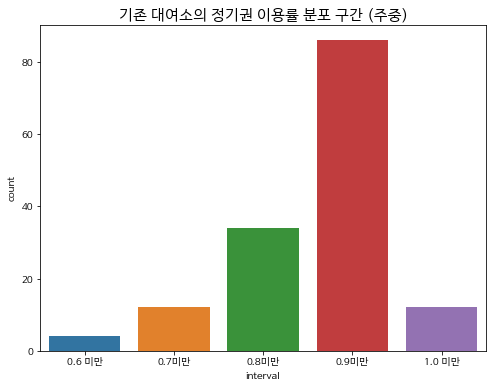

In [62]:
plt.rcParams['font.family']="Hancom Gothic"

plt.figure(figsize=(8,6))
sns.countplot(df_station_over10_week['interval'])
plt.title('기존 대여소의 정기권 이용률 분포 구간 (주중)',fontsize=15)
plt.xticks([0,1,2,3,4],['0.6 미만','0.7미만','0.8미만','0.9미만','1.0 미만'])
plt.show()

### 19년도 주말 확인

In [63]:
df_station_over10_hol['19_hol_regular'].describe()

count    315.000000
mean       0.725519
std        0.080539
min        0.379399
25%        0.685724
50%        0.735557
75%        0.776632
max        0.958904
Name: 19_hol_regular, dtype: float64

#### 19년도 주말

- 최소값  : 0.38
- 1분위수 : 0.69
- 2분위수 : 0.75
- 3분위수 : 0.78
- 최대값  : 0.96

---
1) value < 0.6   
2) 0.6 <= value < 0.7   
3) 0.7 <= value < 0.8  
4) 0.8 <= value < 0.9  
5) 0.9 <= value < 1.0  

구간을 나눠서 확인

In [64]:
df_station_over10_hol['interval']=df_station_over10_hol['19_hol_regular'].apply(lambda x:make_interval(x))
df_station_over10_hol.head()

,station_id,19_hol_regular,20_hol_regular,hol_diff,interval
0,1003,0.740860,0.635808,0.105052,3
1,1004,0.698438,0.571146,0.127291,2
2,1006,0.758686,0.642586,0.116101,3
3,1008,0.706719,0.596122,0.110597,3
4,1016,0.725989,0.591248,0.134741,3


In [65]:
df_station_over10_hol['interval'].value_counts()

3    167
2     77
4     47
1     23
5      1
Name: interval, dtype: int64

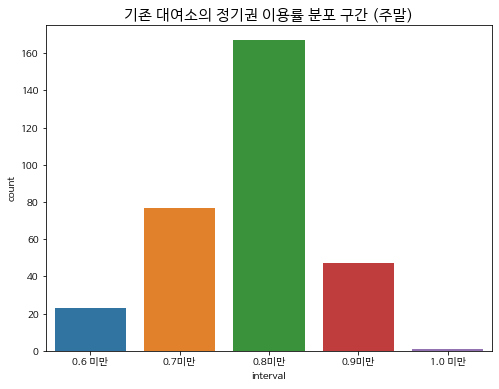

In [66]:
plt.rcParams['font.family']="Hancom Gothic"

plt.figure(figsize=(8,6))
sns.countplot(df_station_over10_hol['interval'])
plt.title('기존 대여소의 정기권 이용률 분포 구간 (주말)',fontsize=15)
plt.xticks([0,1,2,3,4],['0.6 미만','0.7미만','0.8미만','0.9미만','1.0 미만'])
plt.show()